# Sensitivity Analysis of an External Model with Time-Series Output


Notebook developed by Saman Razavi and Cordell Blanchard

### For the VARS method, please cite:

Razavi, S., & Gupta, H. V. (2016). A new framework for comprehensive, robust, and efficient global sensitivity analysis: 1. Theory. Water Resources Research, 52(1), 423-439. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015WR017558

Razavi, S., & Gupta, H. V. (2016). A new framework for comprehensive, robust, and efficient global sensitivity analysis: 2. Application. Water Resources Research, 52(1), 440-455. https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1002/2015WR017559

### For the Generalized VARS (G-VARS) method, please cite:

Do, N. C., & Razavi, S. (2020). Correlation effects? A major but often neglected component in sensitivity and uncertainty analysis. Water Resources Research, 56(3), e2019WR025436. https://doi.org/10.1029/2019WR025436

### For the VARS method on dynamical model response, please cite:

Razavi, S., & Gupta, H. V. (2019). A multi-method Generalized Global Sensitivity Matrix approach to accounting for the dynamical nature of earth and environmental systems models. Environmental modelling & software, 114, 1-11. https://doi.org/10.1016/j.envsoft.2018.12.002

## Exercise 8: How to run VARS/G-VARS in the ‘off-line’ mode for time-series outputs
### Objective:

This notebook extends the previous exercise to external models with time-series outputs. It runs a sensitivity analysis when the model is not directly coupled with VARS/G-VARS – for example, when the model is written in a different programming language. There are three steps:

(1) first run parts of VARS/G-VARS to generate all sample points (model input sets) based on the given distributional properties of interest and print them in a .csv file, 

(2) independent of VARS-TOOL, read all those input sets from the .csv file, execute the external model for each row to obtain the respective time series outputs, and create a new .csv file for the model outputs.

(3) read in the .csv file with model outputs and run the rest of VARS/G-VARS to generate all the sensitivity indices.

**Example research question:** Consider a research question similar to that of Exercise 5 or 6, with the only difference that the model you have to deal with is external to the Python environment; for example, it is an executable file.

First import the needed libraries, including `TSVARS` and `TSGVARS` for time-varying sensitivity analysis with VARS and G-VARS.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from varstool import TSVARS, TSGVARS

### Set up two off-line experiments, one with TSVARS and the other with TSGVARS

The example experiments bellow are with the HBV-SASK model, assuming that it runs externally. 

**Experiment 1** is to demonstrate how to run **TSVARS** in the off-line mode.

**Experiment 2** is to demonstrate how to run **TSGVARS** in the off-line mode.

In [2]:
# Define Experiment 1

experiment_1 = TSVARS(parameters = { # name   lower bound   upper bound
                                      'TT'   :  [ -4.00   ,   4.00],
                                      'C0'   :  [  0.00   ,   10.0],
                                      'ETF'  :  [  0.00   ,   1.00],
                                      'LP'   :  [  0.00   ,   1.00],
                                      'FC'   :  [  50.0   ,   500 ],
                                      'beta' :  [  1.00   ,   3.00],
                                      'FRAC' :  [  0.10   ,   0.90],
                                      'K1'   :  [  0.05   ,   1.00],
                                      'alpha':  [  1.00   ,   3.00],
                                      'K2'   :  [  0.00   ,   0.05],
                                      'UBAS' :  [  1.00   ,   3.00],
                                      'PM'   :  [  0.50   ,   2.00],},
                      num_stars        = 10,
                      delta_h          = 0.1,
                      ivars_scales     = (0.1, 0.3, 0.5),
                      sampler          = 'lhs',
                      seed             = 123456789,
                      bootstrap_flag   = True,
                      bootstrap_size   = 1000,
                      bootstrap_ci     = 0.9,
                      grouping_flag    = True,
                      num_grps         = 3,
                      report_verbose   = True,                   
                      func_eval_method ='serial', # The parallel version needs further development and testing
                      vars_eval_method ='serial', # The parallel version needs further development and testing
                      vars_chunk_size  = None,
                     )

In [3]:
# Define Experiment 2

my_parameters = { # name  dist_par1  dist_par1  dist_par1  dist_type
                 'TT'   : (  0.940  ,  0.980  ,   None   , 'unif'     ),
                 'C0'   : (  0.782  ,  0.003  ,   None   , 'norm'     ),
                 'ETF'  : (  0.126  ,  0.008  ,   None   , 'norm'     ),
                 'LP'   : (  0.670  ,  0.018  ,   None   , 'norm'     ),
                 'FC'   : (  227.53 ,  6.930  ,   None   , 'norm'     ),
                 'beta' : (  2.600  ,  3.000  ,  3.000   , 'triangle' ),
                 'FRAC' : (  0.628  ,  0.011  ,   None   , 'norm'     ),
                 'K1'   : (  0.050  ,  0.054  ,  0.050   , 'triangle' ),
                 'alpha': (  1.602  ,  0.011  ,   None   , 'norm'     ),
                 'K2'   : (  0.022  ,  0.001  ,   None   , 'norm'     ),
                 'UBAS' : (  1.000  ,  1.200  ,  1.000   , 'triangle'  ),
                 'PM'   : (  0.980  ,  1.020  ,   None   , 'unif'     ),}

my_corr_mat = np.array([[    1, 0.65,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
                        [ 0.65,    1,    0,    0,    0,    0,    0,    0,    0, 0.12,    0,    0],
                        [    0,    0,    1, 0.12,-0.18, 0.13,    0,    0,    0,-0.22,    0,    0],
                        [    0,    0, 0.12,    1, 0.54, 0.71,-0.14,    0,    0,    0,    0,    0],
                        [    0,    0,-0.18, 0.54,    1, 0.34, 0.20, 0.11,    0, 0.38,    0,    0],
                        [    0,    0, 0.13, 0.71, 0.34,    1,-0.11,    0,    0,-0.13,    0,    0],
                        [    0,    0,    0,-0.14, 0.20,-0.11,    1,    0,-0.69,-0.39,-0.19,    0],
                        [    0,    0,    0,    0, 0.11,    0,    0,    1,-0.34,    0,    0,    0],
                        [    0,    0,    0,    0,    0,    0,-0.69,-0.34,    1, 0.41, 0.40,    0],
                        [    0, 0.12,-0.22,    0, 0.38,-0.13,-0.39,    0, 0.41,    1, 0.14,    0],
                        [    0,    0,    0,    0,    0,    0,-0.19,    0,  0.4, 0.14,    1,    0],
                        [    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1]])

my_num_dir_samples = 10

my_delta_h = 0.1
# my_delta_h = 1 / my_num_dir_samples # or choose values such as 0.1

experiment_2 = TSGVARS(parameters    = my_parameters,
                    corr_mat         = my_corr_mat,
                    num_stars        = 20,
                    num_dir_samples  = my_num_dir_samples,
                    delta_h          = my_delta_h,
                    ivars_scales     = (0.1, 0.3, 0.5),
                    sampler          = 'plhs',
                    slice_size       = 10,
                    seed             = 123456789,
                    bootstrap_flag   = False,
                    bootstrap_size   = 100,
                    bootstrap_ci     = 0.9,
                    grouping_flag    = False,
                    num_grps         = 3,
                    fictive_mat_flag = True,
                    report_verbose   = True,
                    )

### Step 1: Run initial parts of TSVARS/TSGVARS to generate all sample points

Use function `generate_star` to generate all star points and print them in a .csv file. 

In [4]:
# Run Experiment 1 and check out the star points
Ex1_star_points = experiment_1.generate_star()
display(Ex1_star_points)
Ex1_star_points.to_csv('8a - Ex1_star_points.csv')

TT        C0       ETF        LP          FC  \
centre param point                                                       
0      TT    0     -3.829396  7.172187  0.617648  0.719824  333.461089   
             1     -3.029396  7.172187  0.617648  0.719824  333.461089   
             2     -2.229396  7.172187  0.617648  0.719824  333.461089   
             3     -1.429396  7.172187  0.617648  0.719824  333.461089   
             4     -0.629396  7.172187  0.617648  0.719824  333.461089   
...                      ...       ...       ...       ...         ...   
9      PM    5      0.733612  2.542065  0.345449  0.506972  373.004931   
             6      0.733612  2.542065  0.345449  0.506972  373.004931   
             7      0.733612  2.542065  0.345449  0.506972  373.004931   
             8      0.733612  2.542065  0.345449  0.506972  373.004931   
             9      0.733612  2.542065  0.345449  0.506972  373.004931   

                        beta      FRAC        K1     alpha        K2  \
centre param point                                                     
0      TT    0      1.945988  0.482736  0.563682  1.322434  0.014461   
             1      1.945988  0.482736  0.563682  1.322434  0.014461   
             2      1.945988  0.482736  0.563682  1.322434  0.014461   
             3      1.945988  0.482736  0.563682  1.322434  0.014461   
             4      1.945988  0.482736  0.563682  1.322434  0.014461   
...                      ...       ...       ...       ...       ...   
9      PM    5      2.633413  0.194823  0.630899  2.434665  0.015178   
             6      2.633413  0.194823  0.630899  2.434665  0.015178   
             7      2.633413  0.194823  0.630899  2.434665  0.015178   
             8      2.633413  0.194823  0.630899  2.434665  0.015178   
             9      2.633413  0.194823  0.630899  2.434665  0.015178   

                        UBAS        PM  
centre param point                      
0      TT    0      2.186960  0.710998  
             1      2.186960  0.710998  
             2      2.186960  0.710998  
             3      2.186960  0.710998  
             4      2.186960  0.710998  
...                      ...       ...  
9      PM    5      1.881285  1.396996  
             6      1.881285  1.546996  
             7      1.881285  1.696996  
             8      1.881285  1.846996  
             9      1.881285  1.996996  

[1200 rows x 12 columns]

In [5]:
# Run Experiment 2 and check out the star points
Ex2_star_points = experiment_2.generate_star()
display(Ex2_star_points)
Ex2_star_points.to_csv('8a - Ex2_star_points.csv')

building fictive matrix:   0%|                                                                  | 0/11 [00:00<…

generating star points
:   0%|                                                                   | 0/8 [00:00<…

TT        C0       ETF        LP          FC  \
centre param point                                                       
0      TT    0      0.952887  0.783047  0.125819  0.686250  232.734810   
             1      0.971817  0.783047  0.125819  0.686250  232.734810   
             2      0.963557  0.783047  0.125819  0.686250  232.734810   
             3      0.968860  0.783047  0.125819  0.686250  232.734810   
             4      0.950994  0.783047  0.125819  0.686250  232.734810   
...                      ...       ...       ...       ...         ...   
19     PM    5      0.940966  0.780112  0.124063  0.696759  232.681429   
             6      0.940966  0.780112  0.124063  0.696759  232.681429   
             7      0.940966  0.780112  0.124063  0.696759  232.681429   
             8      0.940966  0.780112  0.124063  0.696759  232.681429   
             9      0.940966  0.780112  0.124063  0.696759  232.681429   

                        beta      FRAC        K1     alpha        K2  \
centre param point                                                     
0      TT    0      2.874861  0.639481  0.051044  1.599784  0.021210   
             1      2.874861  0.639481  0.051044  1.599784  0.021210   
             2      2.874861  0.639481  0.051044  1.599784  0.021210   
             3      2.874861  0.639481  0.051044  1.599784  0.021210   
             4      2.874861  0.639481  0.051044  1.599784  0.021210   
...                      ...       ...       ...       ...       ...   
19     PM    5      2.957867  0.606733  0.053352  1.618112  0.022359   
             6      2.957867  0.606733  0.053352  1.618112  0.022359   
             7      2.957867  0.606733  0.053352  1.618112  0.022359   
             8      2.957867  0.606733  0.053352  1.618112  0.022359   
             9      2.957867  0.606733  0.053352  1.618112  0.022359   

                        UBAS        PM  
centre param point                      
0      TT    0      1.035858  0.995565  
             1      1.035858  0.995565  
             2      1.035858  0.995565  
             3      1.035858  0.995565  
             4      1.035858  0.995565  
...                      ...       ...  
19     PM    5      1.143972  0.989380  
             6      1.143972  1.014003  
             7      1.143972  1.005906  
             8      1.143972  1.004885  
             9      1.143972  1.000871  

[2400 rows x 12 columns]

### Step 2: Run your model externally (off-line)

In this step, you may leave this notebook, run your model externally for all the input sets printed in the above .csv file, and then create a new .csv file containing only the time-series outputs. In this file, the time-series output of each model run should be added row-wise, next to the respective star point. You may refer to the example files given with this exercise. 

When you are done with this step, proceed to the next step.

***
**[Here, for demonstration purposes only, you may go to the appendix of this notebook for an example based on the HBV-SASK model.]**

### Step 3: Read in the outputs of the external model and run the rest of TSVARS/TSGVARS

Read the .csv file including the model time-series outputs and convert it to a dataframe. The dataframe is the standard format expected to be inputted into the `run_offline` method next.

In [6]:
# Read Experiment 1 model outputs
Ex1_modelframe = pd.read_csv('8b - Ex1_model_time_series_outputs.csv', index_col=[0, 1, 2])
display(Ex1_modelframe)

2005-10-01  2005-10-02  2005-10-03  2005-10-04  \
centre param point                                                   
0      TT    0       15.042429   18.813523   15.795275   13.006481   
             1       15.048051   18.819063   15.800735   13.011863   
             2       15.057955   18.829256   15.810189   13.020775   
             3       15.069459   18.841263   15.821106    9.290431   
             4       15.072230   18.844042   15.823778    9.292961   
...                        ...         ...         ...         ...   
9      PM    5       56.117995   56.845991   43.314279   32.408736   
             6       67.699001   69.248335   52.539163   39.120164   
             7       79.524586   82.011777   62.046899   46.065810   
             8       91.367283   95.032056   71.785045   53.232130   
             9      103.540572  108.235098   81.720368   60.615171   

                    2005-10-05  2005-10-06  2005-10-07  2005-10-08  \
centre param point                                                   
0      TT    0       14.676629   11.272543    9.043326    9.393227   
             1       14.681933   11.277771    9.048479    9.398305   
             2       14.691013   11.286239    9.056586    9.406399   
             3        9.721272   12.921267   12.637023   11.388479   
             4        7.206359    6.385414   12.337330   17.492589   
...                        ...         ...         ...         ...   
9      PM    5       31.914662   31.428322   40.535609   57.821703   
             6       38.521341   37.932299   50.194249   68.109785   
             7       45.356611   44.659853   58.992456   77.948286   
             8       52.406533   51.596982   67.137958   87.836068   
             9       59.666719   58.739233   75.343609   97.632181   

                    2005-10-09  2005-10-10  ...  2006-09-21  2006-09-22  \
centre param point                          ...                           
0      TT    0        9.191692    7.223959  ...    1.781663    1.861255   
             1        9.196696    7.228891  ...    1.784919    1.864467   
             2        9.204677    7.236515  ...    1.788789    1.868278   
             3        9.988278    7.490645  ...    1.808886    1.888087   
             4       11.560116    7.905817  ...    1.868223    1.946570   
...                        ...         ...  ...         ...         ...   
9      PM    5       46.769863   32.270452  ...   10.486704   10.485051   
             6       54.549937   39.136950  ...   12.408351   12.466383   
             7       63.405931   47.059905  ...   14.496433   14.650117   
             8       73.237685   55.865081  ...   16.710397   17.009500   
             9       81.936982   65.689631  ...   19.020659   19.531425   

                    2006-09-23  2006-09-24  2006-09-25  2006-09-26  \
centre param point                                                   
0      TT    0        1.933946    1.817831    1.702153    1.620545   
             1        1.937114    1.820950    1.705225    1.623571   
             2        1.940868    1.824653    1.708876    1.627171   
             3        1.960392    1.843893    1.727836    1.645855   
             4        2.018033    1.900695    1.783813    1.701020   
...                        ...         ...         ...         ...   
9      PM    5       10.395480   10.193481    9.989341    9.801855   
             6       12.381465   12.104377   11.832182   11.593200   
             7       14.574411   14.188258   13.827757   13.528298   
             8       16.944983   16.403421   15.933766   15.567217   
             9       19.473519   18.715508   18.118109   17.681184   

                    2006-09-27  2006-09-28  2006-09-29  2006-09-30  
centre param point                                                  
0      TT    0        1.603267    1.597106    1.536442    1.484981  
             1        1.606249    1.600045    1.539338    1.487835  
             2        1.609797    1

In [7]:
# Read Experiment 2 model outputs
Ex2_modelframe = pd.read_csv('8b - Ex2_model_time_series_outputs.csv', index_col=[0, 1, 2])
display(Ex2_modelframe)

2005-10-01  2005-10-02  2005-10-03  2005-10-04  \
centre param point                                                   
0      TT    0       25.271552   32.522375   26.739454   22.007787   
             1       25.278221   32.529029   26.745833   22.013938   
             2       25.275308   32.526122   26.743046   22.011251   
             3       25.277173   32.527983   26.744830   22.012971   
             4       25.270885   32.521709   26.738817   22.007172   
...                        ...         ...         ...         ...   
19     PM    5       24.694533   31.773809   26.321148   21.632393   
             6       26.495662   34.156303   28.066333   22.921712   
             7       25.895998   33.363668   27.488191   22.495842   
             8       25.820847   33.264294   27.415535   22.442234   
             9       25.526633   32.875165   27.130652   22.231844   

                    2005-10-05  2005-10-06  2005-10-07  2005-10-08  \
centre param point                                                   
0      TT    0       18.730064   16.356771   18.031036   22.823266   
             1       18.736029   16.362575   18.020123   22.793543   
             2       18.733423   16.360039   18.024881   22.806506   
             3       18.735092   16.361663   18.021822   22.798180   
             4       18.729467   16.356191   18.032129   22.826241   
...                        ...         ...         ...         ...   
19     PM    5       18.413550   16.109752   17.670029   22.307670   
             6       19.431324   16.955417   18.612301   23.568175   
             7       19.095675   16.676725   18.301668   23.152156   
             8       19.053386   16.641597   18.262523   23.099766   
             9       18.887337   16.503637   18.108801   22.894108   

                    2005-10-09  2005-10-10  ...  2006-09-21  2006-09-22  \
centre param point                          ...                           
0      TT    0       20.649371   18.778822  ...    3.032146    3.181947   
             1       20.609745   18.732217  ...    3.036924    3.186719   
             2       20.627026   18.752540  ...    3.034839    3.184637   
             3       20.615927   18.739487  ...    3.036178    3.185974   
             4       20.653337   18.783488  ...    3.031668    3.181470   
...                        ...         ...  ...         ...         ...   
19     PM    5       20.365224   18.537427  ...    2.957626    3.084204   
             6       21.439620   19.463730  ...    3.116171    3.260730   
             7       21.085595   19.158802  ...    3.063467    3.201916   
             8       21.040972   19.120346  ...    3.056846    3.194537   
             9       20.865715   18.969264  ...    3.030995    3.165746   

                    2006-09-23  2006-09-24  2006-09-25  2006-09-26  \
centre param point                                                   
0      TT    0        3.130304    3.029779    2.935020    2.845530   
             1        3.134971    3.034322    2.939445    2.849842   
             2        3.132934    3.032340    2.937515    2.847961   
             3        3.134242    3.033613    2.938754    2.849168   
             4        3.129837    3.029325    2.934578    2.845099   
...                        ...         ...         ...         ...   
19     PM    5        3.036120    2.940015    2.847996    2.760865   
             6        3.210205    3.106046    3.006569    2.912637   
             7        3.152210    3.050772    2.953811    2.862169   
             8        3.144935    3.043835    2.947187    2.855831   
             9        3.116542    3.016757    2.921327    2.831082   

                    2006-09-27  2006-09-28  2006-09-29  2006-09-30  
centre param point                                                  
0      TT    0        2.846703    2.763782    2.680610    2.601705  
             1        2.850943    2.767917    2.684641    2.605637  
             2        2.849093    2

### Important Note:
If after Step 1 you have restarted this notebook, you need to redefine the experiment above and regenerate star points (Step 1). This is to reload the experiment with all the data needed before running it in full. Just make sure not to change the experiment attributes and seed number. 

In [8]:
# Run the rest of Experiment 1
# Ex1_star_points = pd.read_csv('8a - Ex1_star_points.csv', index_col = [0, 1, 2])
experiment_1.run_offline(Ex1_modelframe)

building pairs:   0%|                                                                          | 0/365 [00:00<…

TSVARS analysis:   0%|                                                                          | 0/10 [00:00<…

In [9]:
# Run the rest of Experiment 2
# Ex2_star_points = pd.read_csv('8a - Ex2_star_points.csv', index_col = [0, 1, 2])
experiment_2.run_offline(Ex2_modelframe)

building pairs:   0%|                                                                          | 0/365 [00:00<…

calculating 'h' values:   0%|          | 0/20 [00:00<?, ?it/s]

binning pairs based on 'h' values:   0%|          | 0/20 [00:00<?, ?it/s]

reordering pairs at each time step:   0%|                                                      | 0/365 [00:00<…

TSGVARS analysis:   0%|                                                                         | 0/10 [00:00<…

Now that the results are ready, you may generate all the plots already shown in Exercises 5 and 6. Below, a sample plot is given that shows time-aggregate sensitivity indices for all the parameters in linear and log scales.

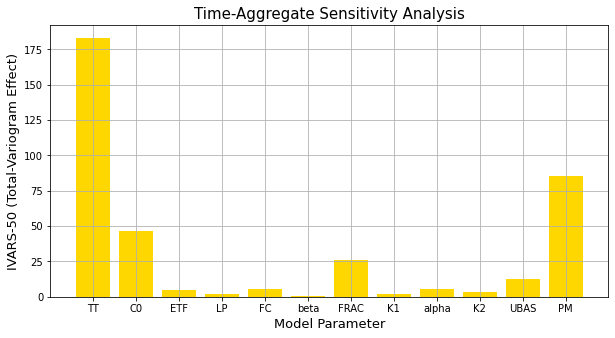

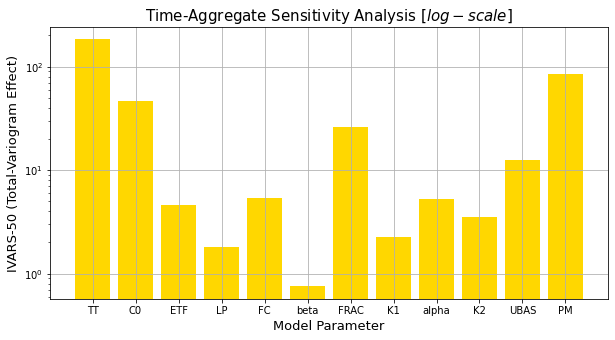

In [10]:
# Plot time-aggregate sensitivity indices of Experiment 1
ivars_scale = 0.5   # Choose the scale range of interest, e.g., 0.1, 0.3, or 0.5

cols = experiment_1.parameters.keys()
time_aggregate_SA = experiment_1.ivars.aggregate.unstack(level=0)[cols]

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols,time_aggregate_SA.loc[pd.IndexSlice[ ivars_scale ]], color='gold')
plt.gca().set_title (r'Time-Aggregate Sensitivity Analysis', fontsize = 15)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().set_yscale('linear')
plt.gca().grid()

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols,time_aggregate_SA.loc[pd.IndexSlice[ ivars_scale ]], color='gold')
plt.gca().set_title (r'Time-Aggregate Sensitivity Analysis $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().set_yscale('log')
plt.gca().grid()

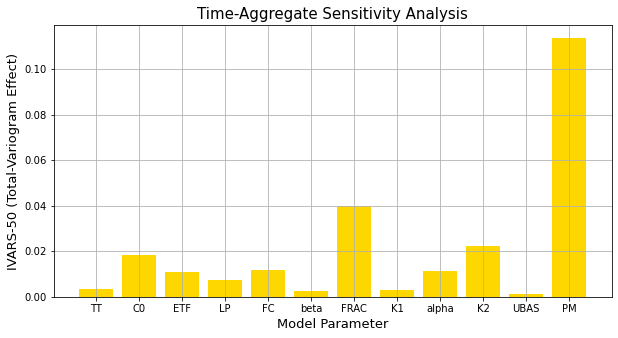

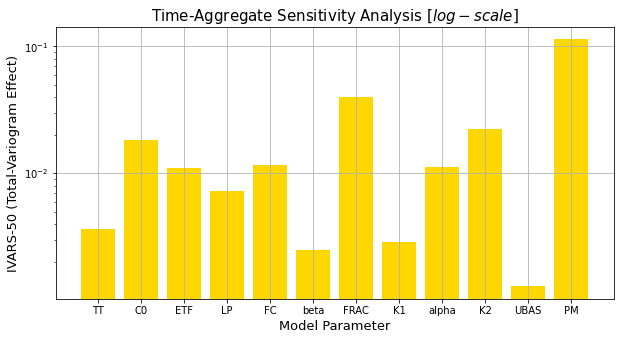

In [11]:
# Plot time-aggregate sensitivity indices of Experiment 2
ivars_scale = 0.5   # Choose the scale range of interest, e.g., 0.1, 0.3, or 0.5

cols = experiment_2.parameters.keys()
time_aggregate_SA = experiment_2.ivars.aggregate.unstack(level=0)[cols]

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols,time_aggregate_SA.loc[pd.IndexSlice[ ivars_scale ]], color='gold')
plt.gca().set_title (r'Time-Aggregate Sensitivity Analysis', fontsize = 15)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().set_yscale('linear')
plt.gca().grid()

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols,time_aggregate_SA.loc[pd.IndexSlice[ ivars_scale ]], color='gold')
plt.gca().set_title (r'Time-Aggregate Sensitivity Analysis $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().set_yscale('log')
plt.gca().grid()

### Appendix: An example of Step 2 above

The cells below run the HBV-SASK model semi-externally for demonstration purposes only. For real external models, the users have to figure out how to run their models for different inputs.

In [12]:
from varstool import Model
import hbv

In [13]:
def custom_HBV_SASK_3(x):
    param = x.to_dict()
    # running the HBV-SASK Model
    basin = 'Oldman Basin'  # choose the basin of interest, either 'Oldman Basin' or 'Banff Basin'
    flux, state, forcing = hbv.HBV_SASK(basin, param)
    
    start_day ='2005-10-01'  # choose the start date for the period of interest
    end_day   ='2006-09-30'  # choose the end date for the period of interest
    
    # choosing the flux or state variable of interest to report
    out = flux['Q_cms'][start_day:end_day]  # 'Q_cms' (streamflow) is an example flux
#     out = state['SMS'][start_day:end_day]   # 'SMS' (soil moisture storage) is an example state variable

    return out

In [14]:
HBV_model = Model(custom_HBV_SASK_3)

In [15]:
# Run HBV-SASK for Experiment 1
# run the model and generate a csv file that looks similar to the dataframe below (model results with no star points)
star_points_eval = Ex1_star_points.apply(custom_HBV_SASK_3, axis=1, result_type='expand')
star_points_eval.to_csv('8b - Ex1_model_time_series_outputs.csv')

In [16]:
# Run HBV-SASK for Experiment 2
# run the model and generate a csv file that looks similar to the dataframe below (model results with no star points)
star_points_eval = Ex2_star_points.apply(custom_HBV_SASK_3, axis=1, result_type='expand')
star_points_eval.to_csv('8b - Ex2_model_time_series_outputs.csv')

All done!